# Análisis de datos y su correlación

Importando librerias

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from yellowbrick.style import set_palette
#set_palette('flatui')
%matplotlib inline
import missingno as msno
import ipywidgets as widgets
import warnings
from scipy.stats import chi2_contingency
import ipywidgets as widgets
from ipywidgets import interact
warnings.filterwarnings('ignore')


pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
# importando datos
df = pd.read_csv('new_data_01.csv')
df.head()

,date,visits,date (report),id,seller_id,nickname,official_store,integrator,sellerType,condition,...,questions,calls,whatsapp,daysPublished,Cat_Price,cant_img,cat_atrib,Posiciones,kilometraje,year_00
0,23/11/2023,212,30/11/2023,MLM2696616660,166944815,CHEVROLET IZTACALCOMOTORS,S,Intelimotor,agency,used,...,0,0,0,0,Categoria D,16 a 26 imagenes,51 a 100,Primeros 20,1000-100000 km,2019
1,24/11/2023,172,30/11/2023,MLM2696616660,166944815,CHEVROLET IZTACALCOMOTORS,S,Intelimotor,agency,used,...,2,0,0,1,Categoria D,16 a 26 imagenes,51 a 100,Primeros 20,1000-100000 km,2019
2,25/11/2023,164,30/11/2023,MLM2696616660,166944815,CHEVROLET IZTACALCOMOTORS,S,Intelimotor,agency,used,...,0,0,0,2,Categoria D,16 a 26 imagenes,51 a 100,Primeros 20,1000-100000 km,2019
3,26/11/2023,189,30/11/2023,MLM2696616660,166944815,CHEVROLET IZTACALCOMOTORS,S,Intelimotor,agency,used,...,0,0,1,3,Categoria D,16 a 26 imagenes,51 a 100,Primeros 20,1000-100000 km,2019
4,27/11/2023,166,30/11/2023,MLM2696616660,166944815,CHEVROLET IZTACALCOMOTORS,S,Intelimotor,agency,used,...,0,0,3,4,Categoria D,16 a 26 imagenes,51 a 100,Primeros 20,1000-100000 km,2019


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27323 entries, 0 to 27322
Data columns (total 100 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   date                                                    27323 non-null  object 
 1   visits                                                  27323 non-null  int64  
 2   date (report)                                           27323 non-null  object 
 3   id                                                      27323 non-null  object 
 4   seller_id                                               27323 non-null  int64  
 5   nickname                                                27201 non-null  object 
 6   official_store                                          16778 non-null  object 
 7   integrator                                              27323 non-null  object 
 8   sellerType                         

In [4]:
# number and percentage of missing values according to columns
{col: [df[col].isnull().sum(), f'% {np.round(np.mean(df[col].isnull()*100), 3)}'
      ] for col in df.columns if df[col].isnull().any()}

{'nickname': [122, '% 0.447'],
 'official_store': [10545, '% 38.594'],
 'sellerType': [122, '% 0.447'],
 'size': [23, '% 0.084'],
 'max_size': [23, '% 0.084'],
 'yearId': [5013, '% 18.347'],
 'versionId': [5830, '% 21.337'],
 'motor': [22, '% 0.081'],
 'description': [27323, '% 100.0'],
 'seller_reputation/transactions/canceled': [122, '% 0.447'],
 'seller_reputation/transactions/completed': [122, '% 0.447'],
 'seller_reputation/transactions/period': [122, '% 0.447'],
 'seller_reputation/transactions/total': [122, '% 0.447'],
 'seller_reputation/transactions/ratings/negative': [122, '% 0.447'],
 'seller_reputation/transactions/ratings/neutral': [122, '% 0.447'],
 'seller_reputation/transactions/ratings/positive': [122, '% 0.447'],
 'seller_reputation/metrics/sales/period': [122, '% 0.447'],
 'seller_reputation/metrics/sales/completed': [122, '% 0.447'],
 'seller_reputation/metrics/claims/period': [122, '% 0.447'],
 'seller_reputation/metrics/claims/rate': [122, '% 0.447'],
 'seller_rep

<Axes: >

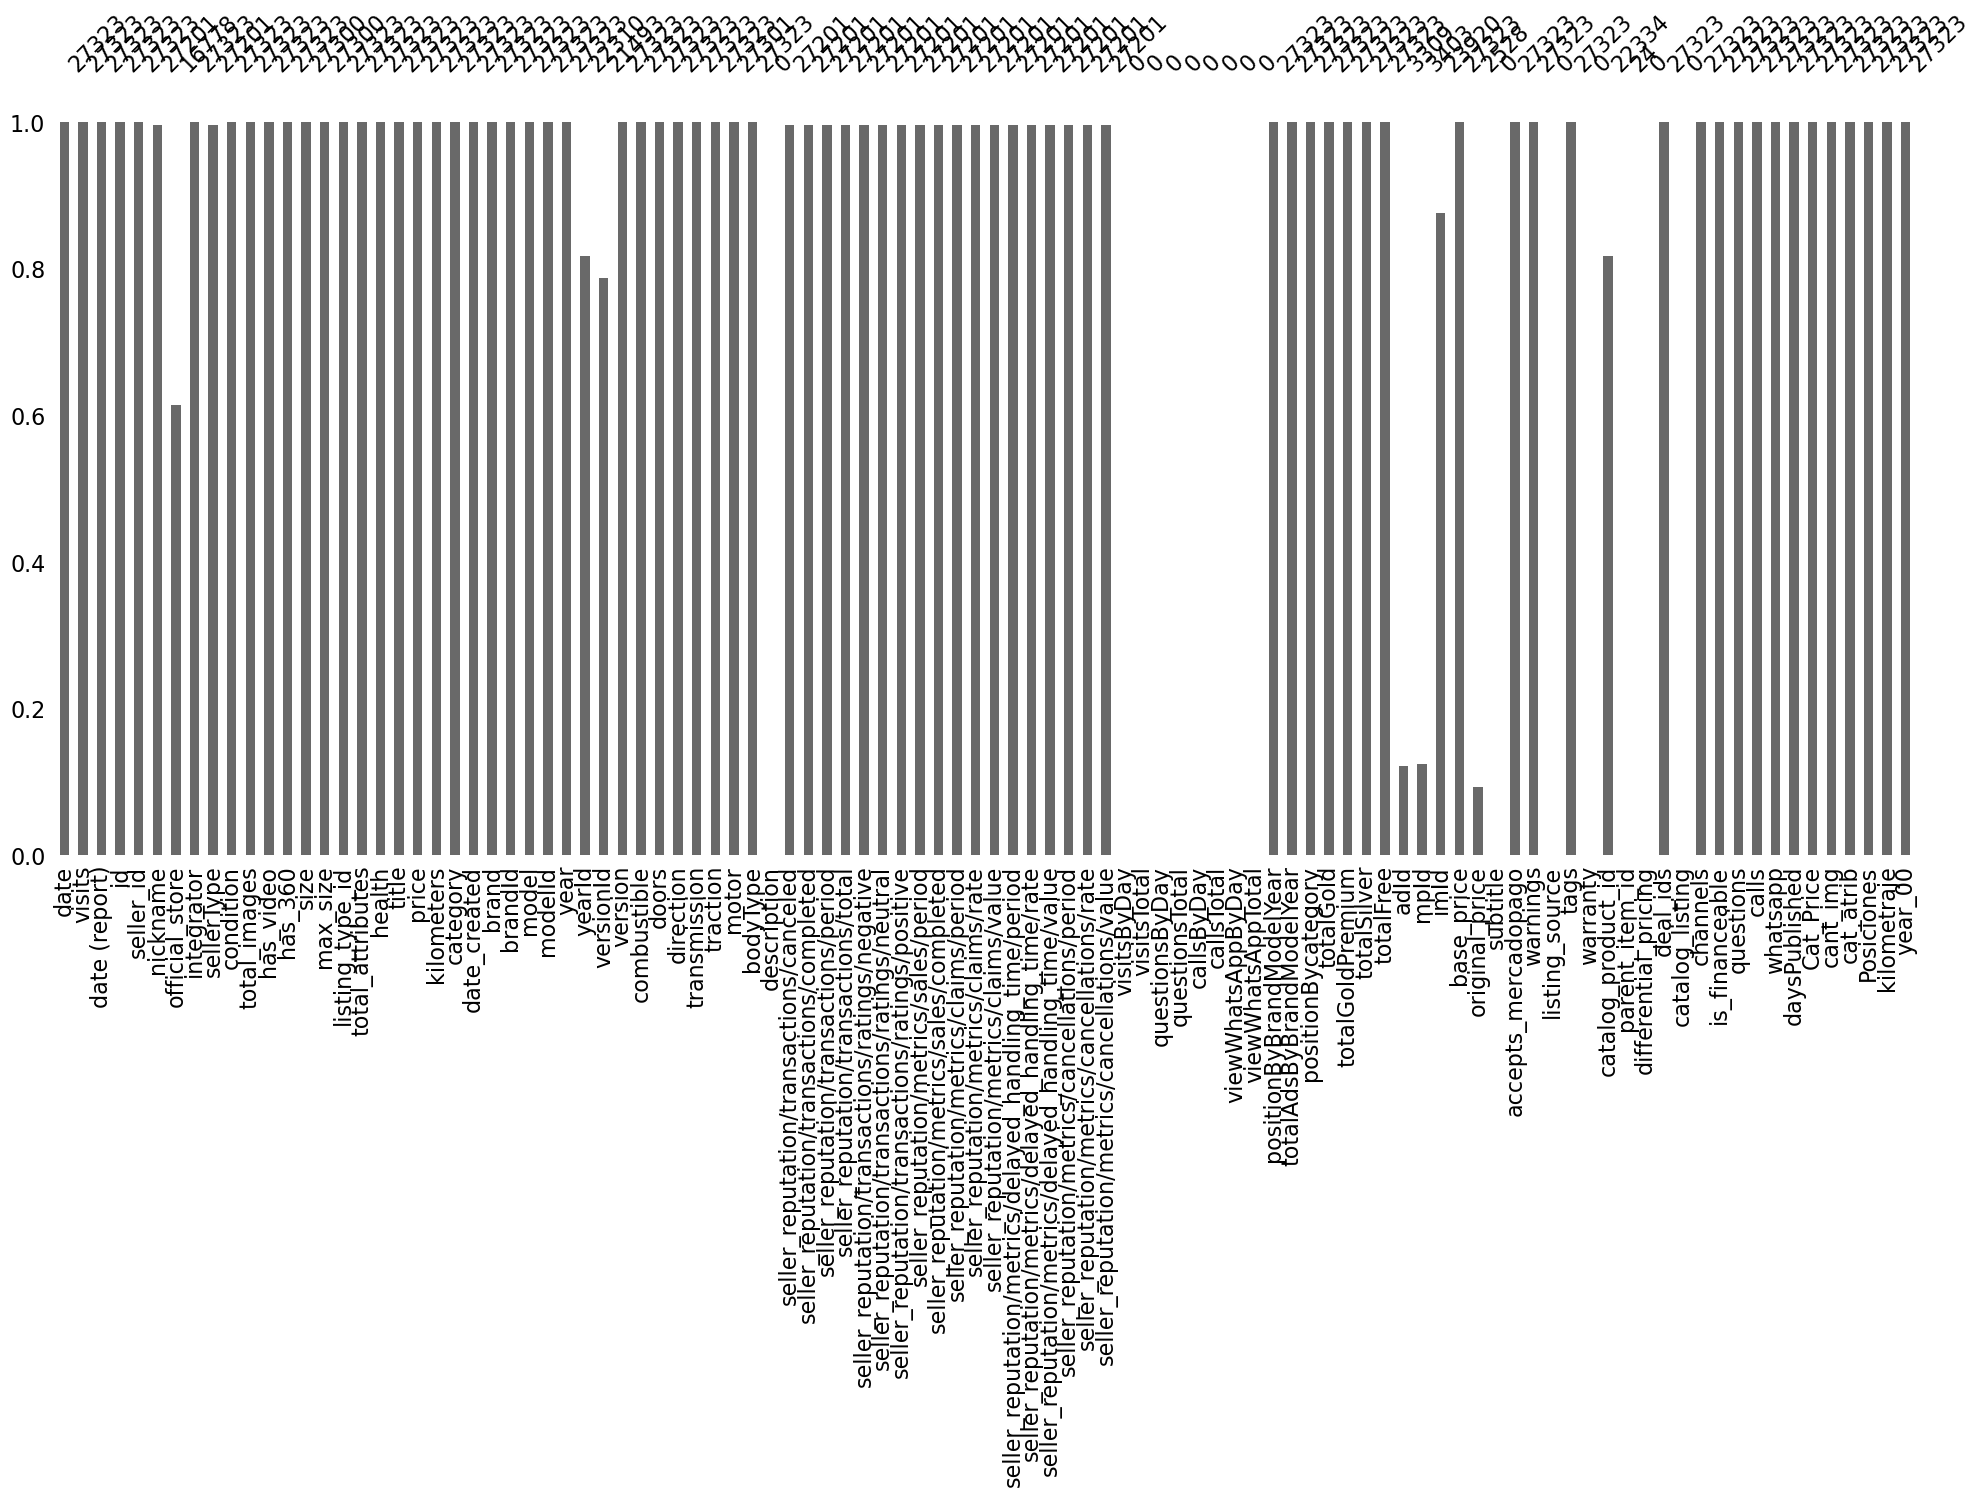

In [5]:
msno.bar(df)

<Axes: >

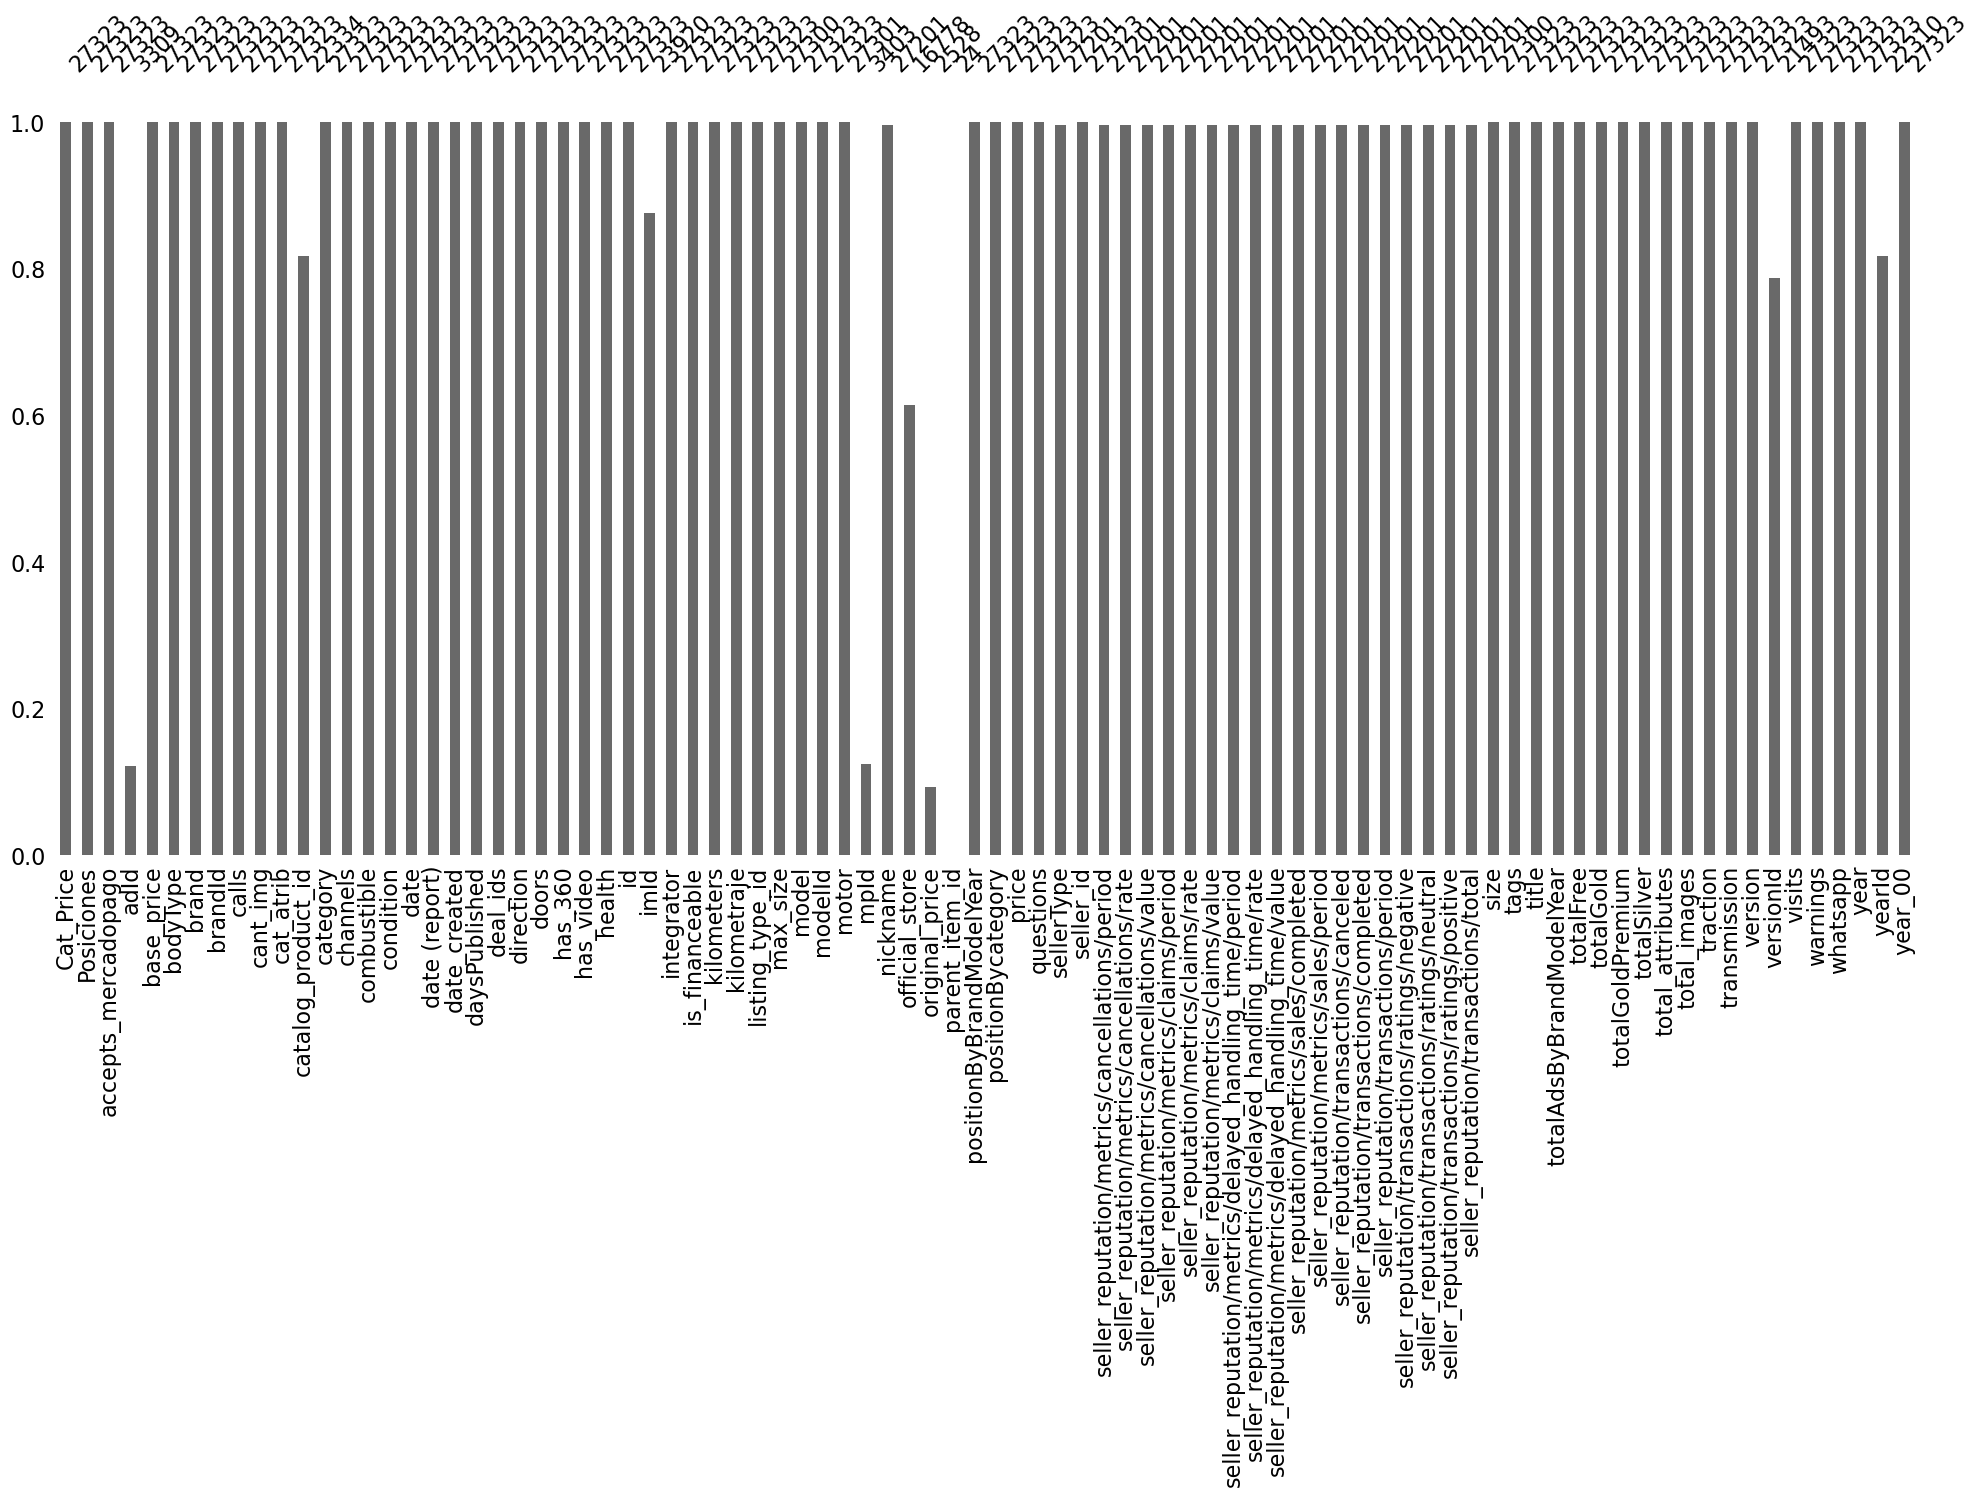

In [6]:
columnas_vacias = df.columns[df.isnull().all()]
columnas_array = columnas_vacias.to_numpy()
df = df[df.columns.difference(columnas_array)]
columnas_con_nulos = df.columns[df.isnull().any()]
columnas_array = df.columns.to_numpy()
msno.bar(df)

## Análisis de valores númericos

In [7]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Obtener la lista de columnas
columnas = df.select_dtypes(['int64','float64'])
numericals = columnas.columns.tolist()

# Crear un widget de menú desplegable (Dropdown)
dropdown_columna = widgets.Dropdown(
    options=numericals,
    value=numericals[0],
    description='Seleccionar Columna:'
)

# Función para actualizar el gráfico según la columna seleccionada
def actualizar_grafico(columna_seleccionada):
    fig = px.scatter(df, x='Posiciones', y=columna_seleccionada, title='Gráfico Interactivo')
    fig.show()

# Vincular el widget con la función de actualización
interact(actualizar_grafico, columna_seleccionada=dropdown_columna);


interactive(children=(Dropdown(description='Seleccionar Columna:', options=('adId', 'base_price', 'brandId', '…

In [8]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Obtener la lista de columnas
columnas = df.select_dtypes(['int64','float64'])
numericals = columnas.columns.tolist()

# Crear un widget de menú desplegable (Dropdown)
dropdown_columna = widgets.Dropdown(
    options=numericals,
    value=numericals[0],
    description='Seleccionar Columna:'
)

# Función para actualizar el gráfico según la columna seleccionada
def actualizar_grafico(columna_seleccionada):
    fig = px.histogram(df,  x=columna_seleccionada, color="Posiciones",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
    fig.show()

# Vincular el widget con la función de actualización
interact(actualizar_grafico, columna_seleccionada=dropdown_columna);

interactive(children=(Dropdown(description='Seleccionar Columna:', options=('adId', 'base_price', 'brandId', '…

## Análisis de atributos categoricos 

In [9]:
df1_numericals = df.select_dtypes(['object'])
numericals = [i for i in df1_numericals.columns]
print('numericals: ', numericals)

numericals:  ['Cat_Price', 'Posiciones', 'bodyType', 'brand', 'cant_img', 'cat_atrib', 'catalog_product_id', 'category', 'channels', 'combustible', 'condition', 'date', 'date (report)', 'date_created', 'deal_ids', 'direction', 'has_360', 'has_video', 'id', 'imId', 'integrator', 'is_financeable', 'kilometraje', 'listing_type_id', 'max_size', 'model', 'motor', 'mpId', 'nickname', 'official_store', 'parent_item_id', 'sellerType', 'seller_reputation/metrics/cancellations/period', 'seller_reputation/metrics/claims/period', 'seller_reputation/metrics/delayed_handling_time/period', 'seller_reputation/metrics/sales/period', 'seller_reputation/transactions/period', 'size', 'tags', 'title', 'traction', 'transmission', 'version', 'warnings']


## Correlación de atributos
la escala va del 0 a 1, siendo 1 la correlacion mas alta y cero más baja

In [10]:
# # Función para calcular Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


<Figure size 640x480 with 0 Axes>

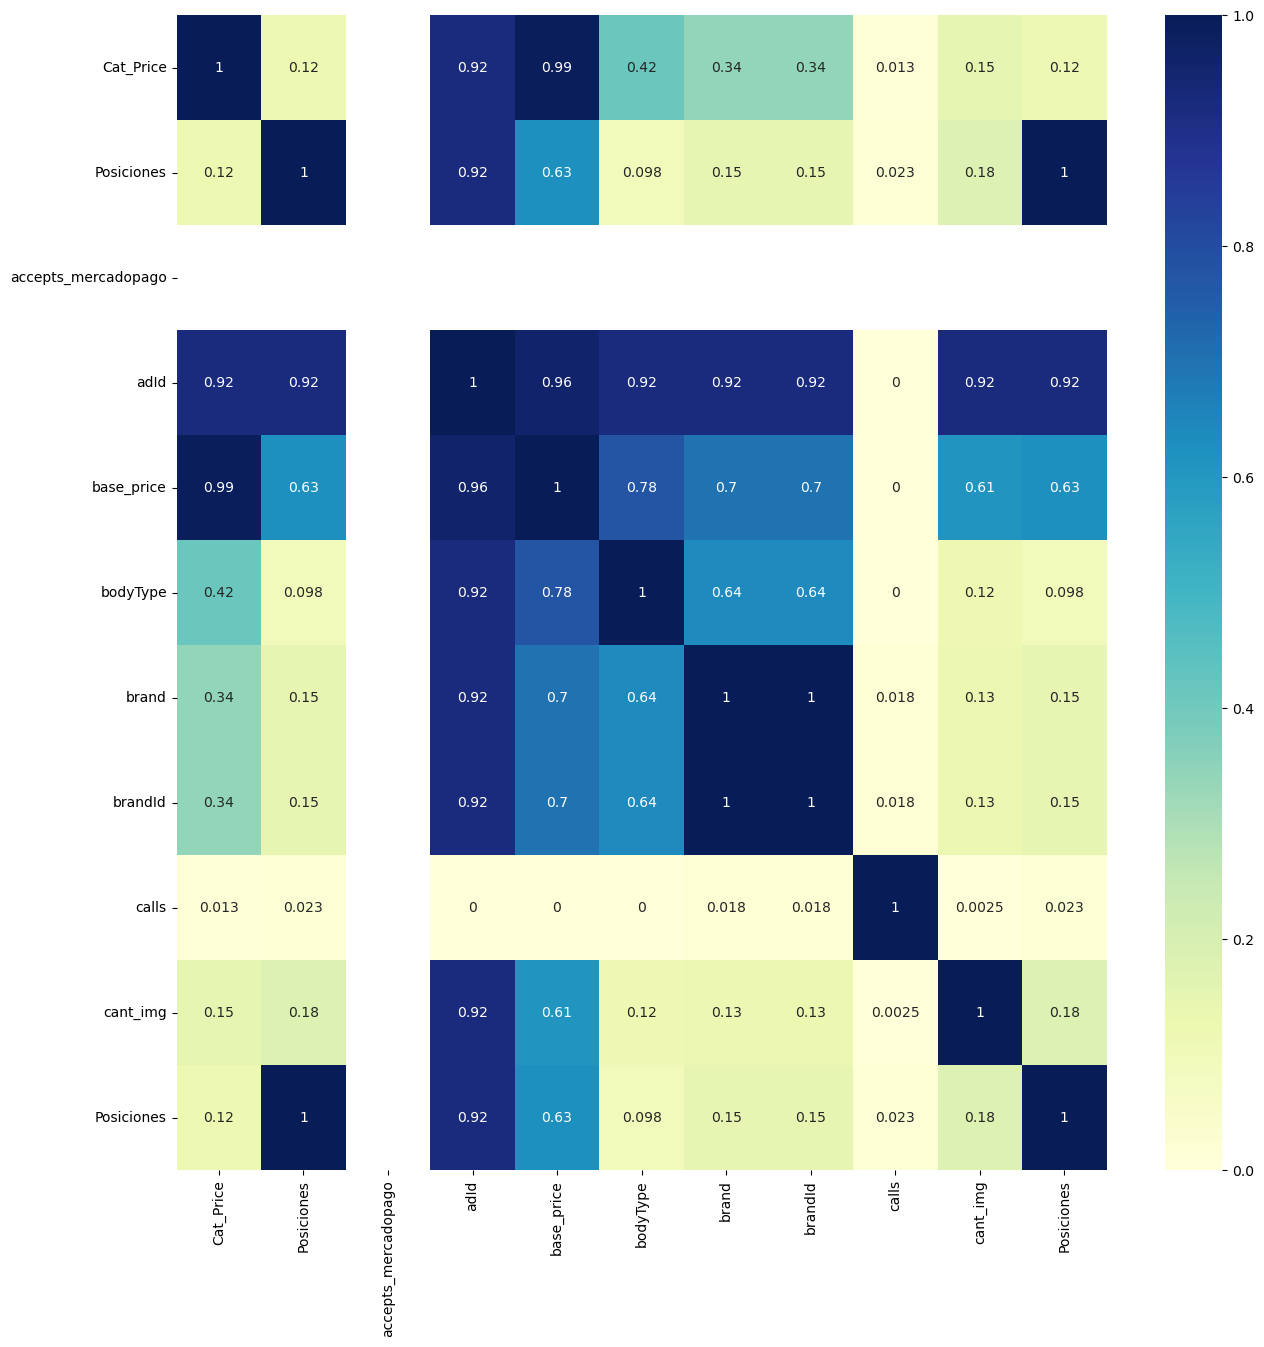

<Figure size 640x480 with 0 Axes>

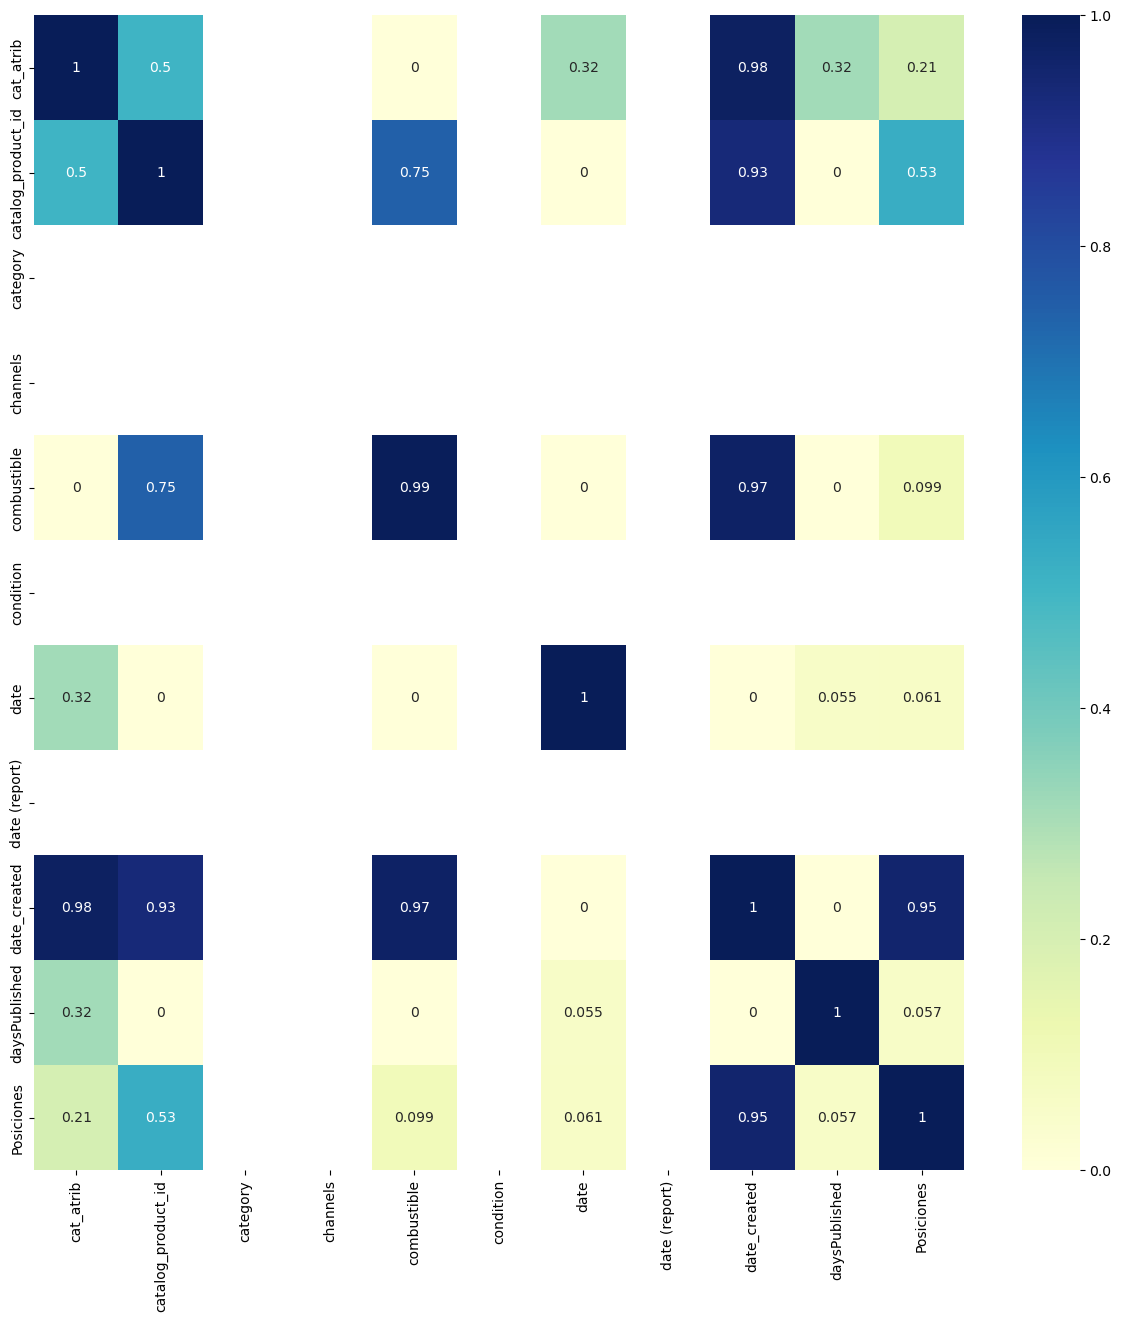

<Figure size 640x480 with 0 Axes>

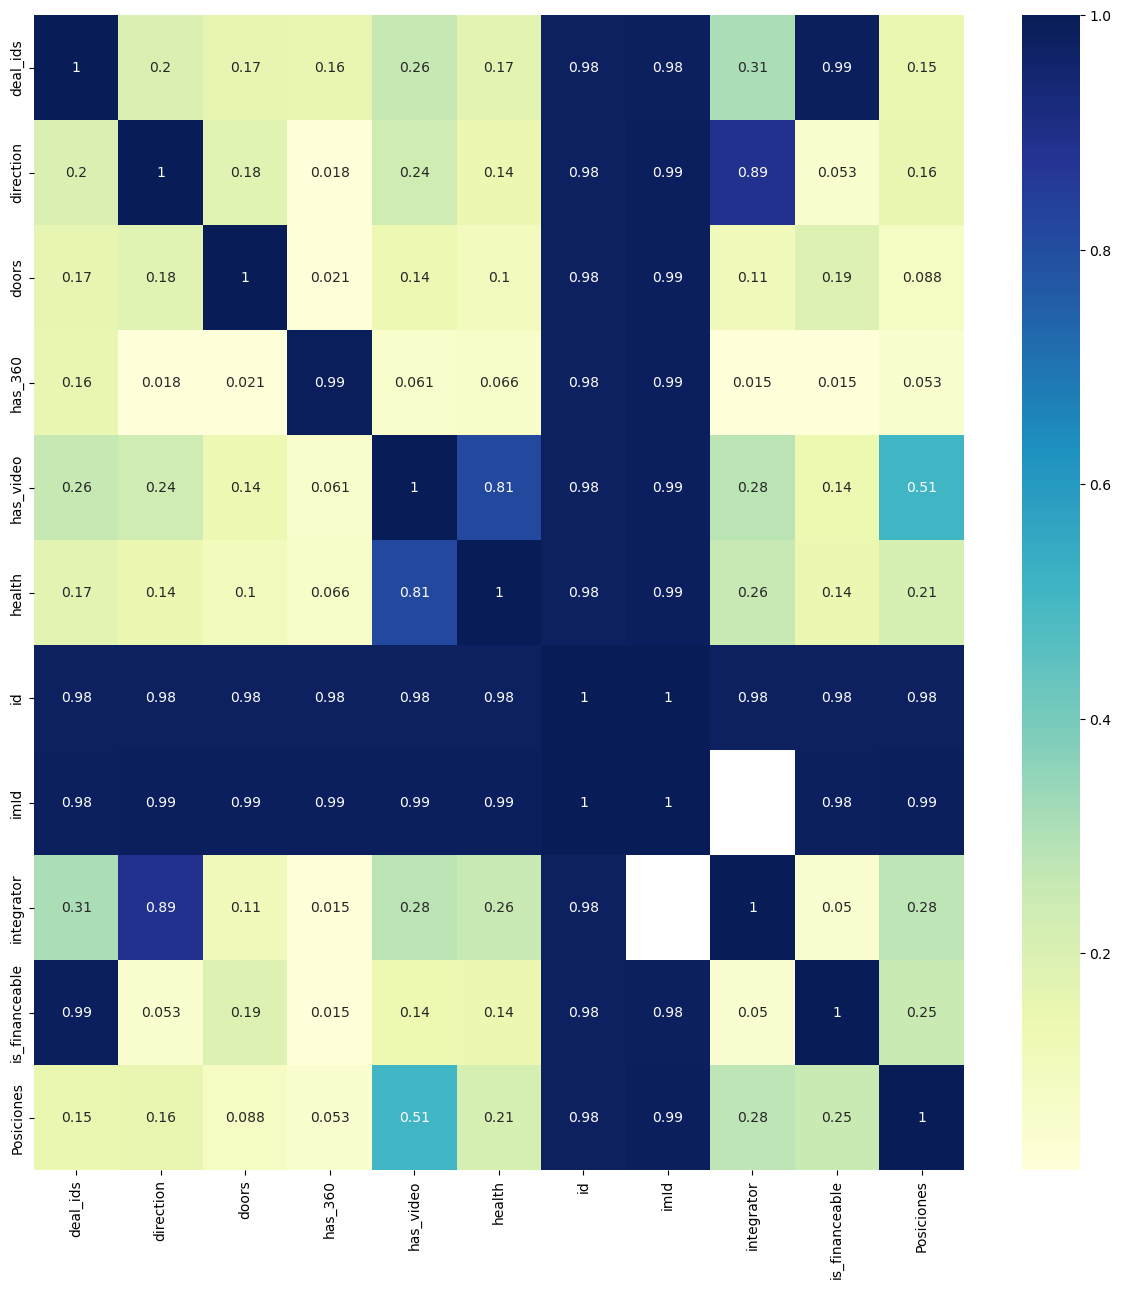

<Figure size 640x480 with 0 Axes>

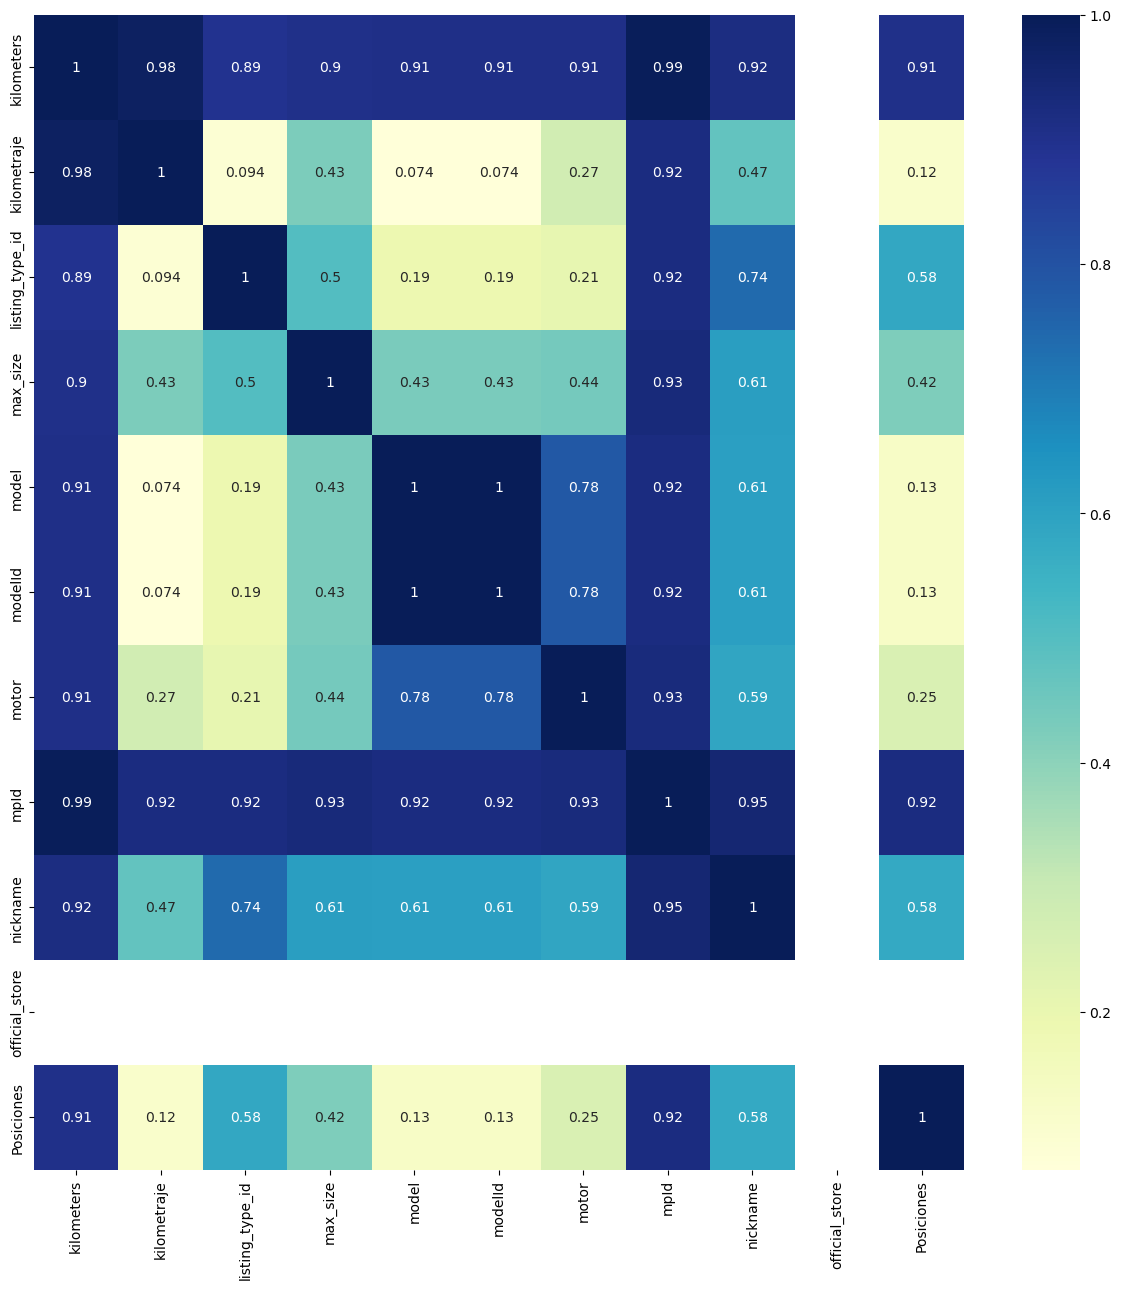

<Figure size 640x480 with 0 Axes>

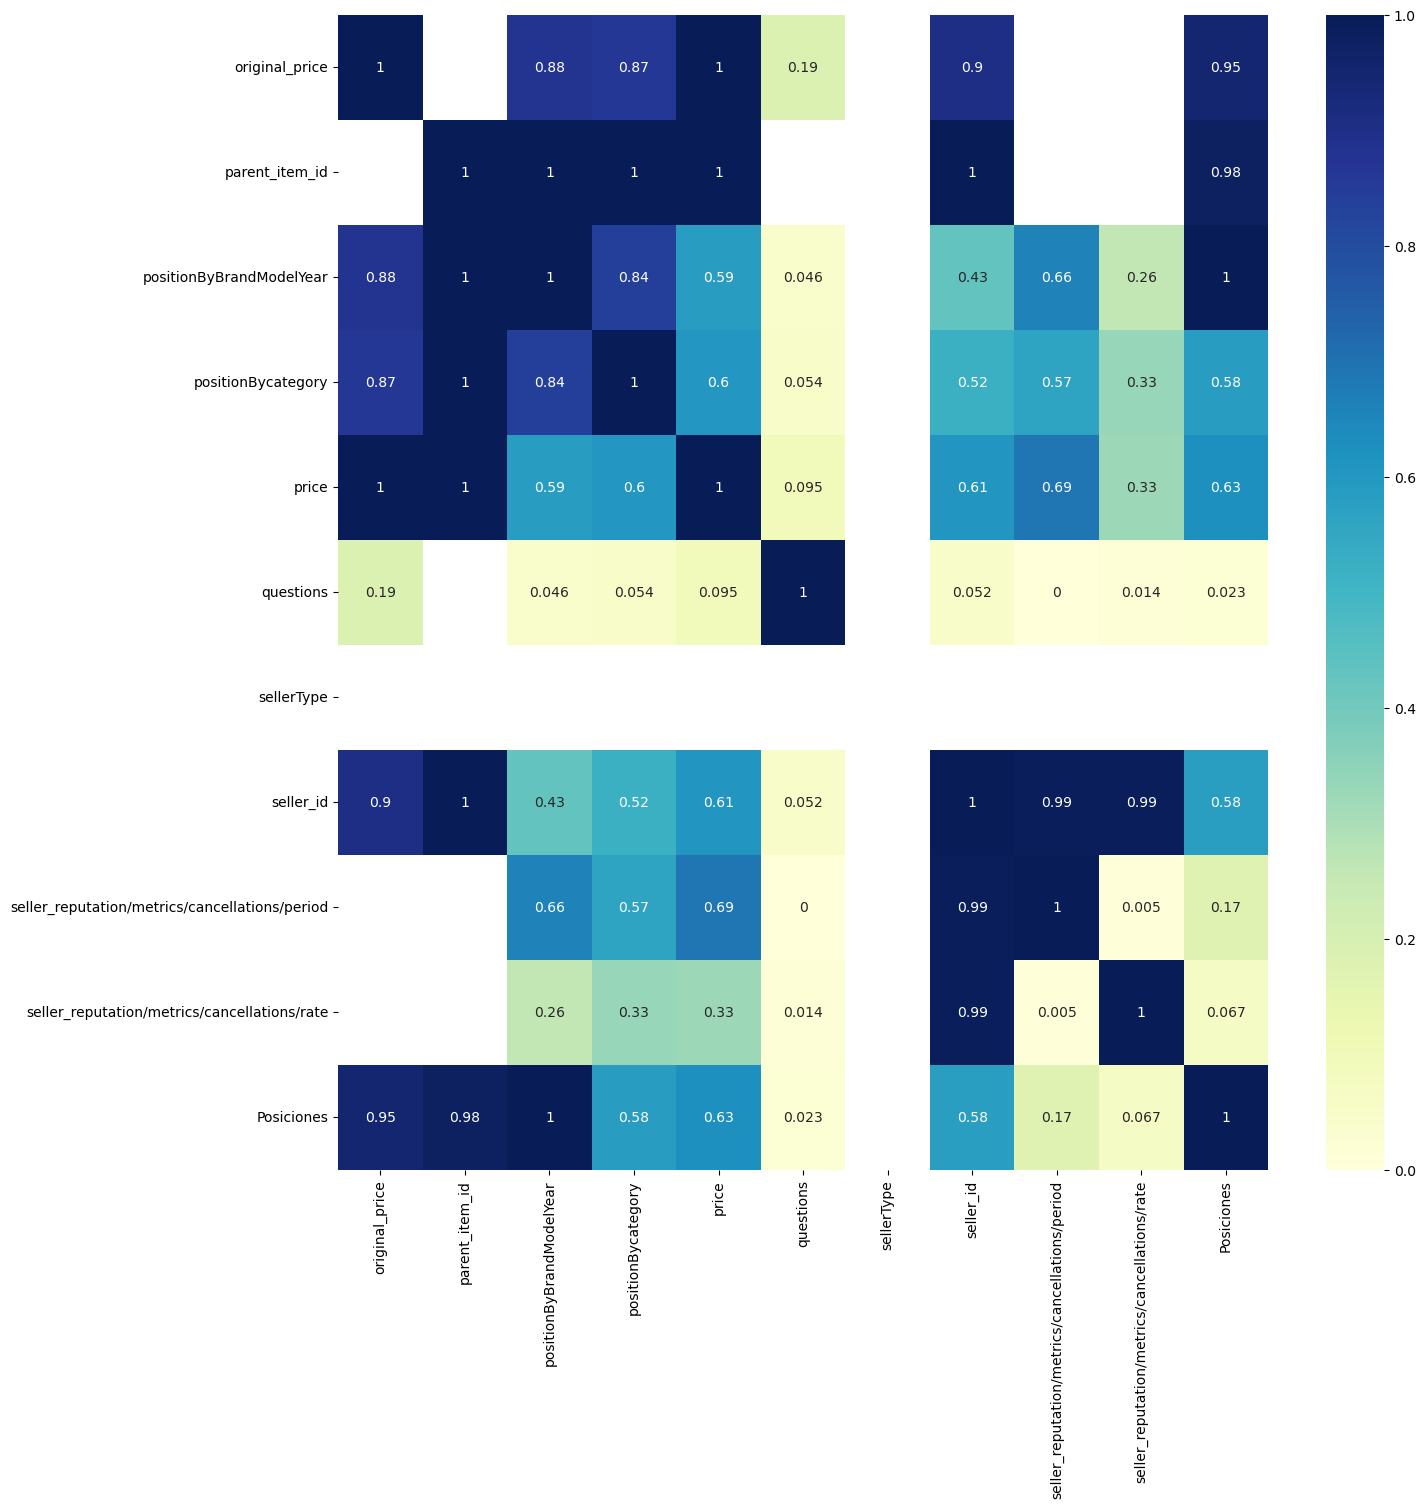

<Figure size 640x480 with 0 Axes>

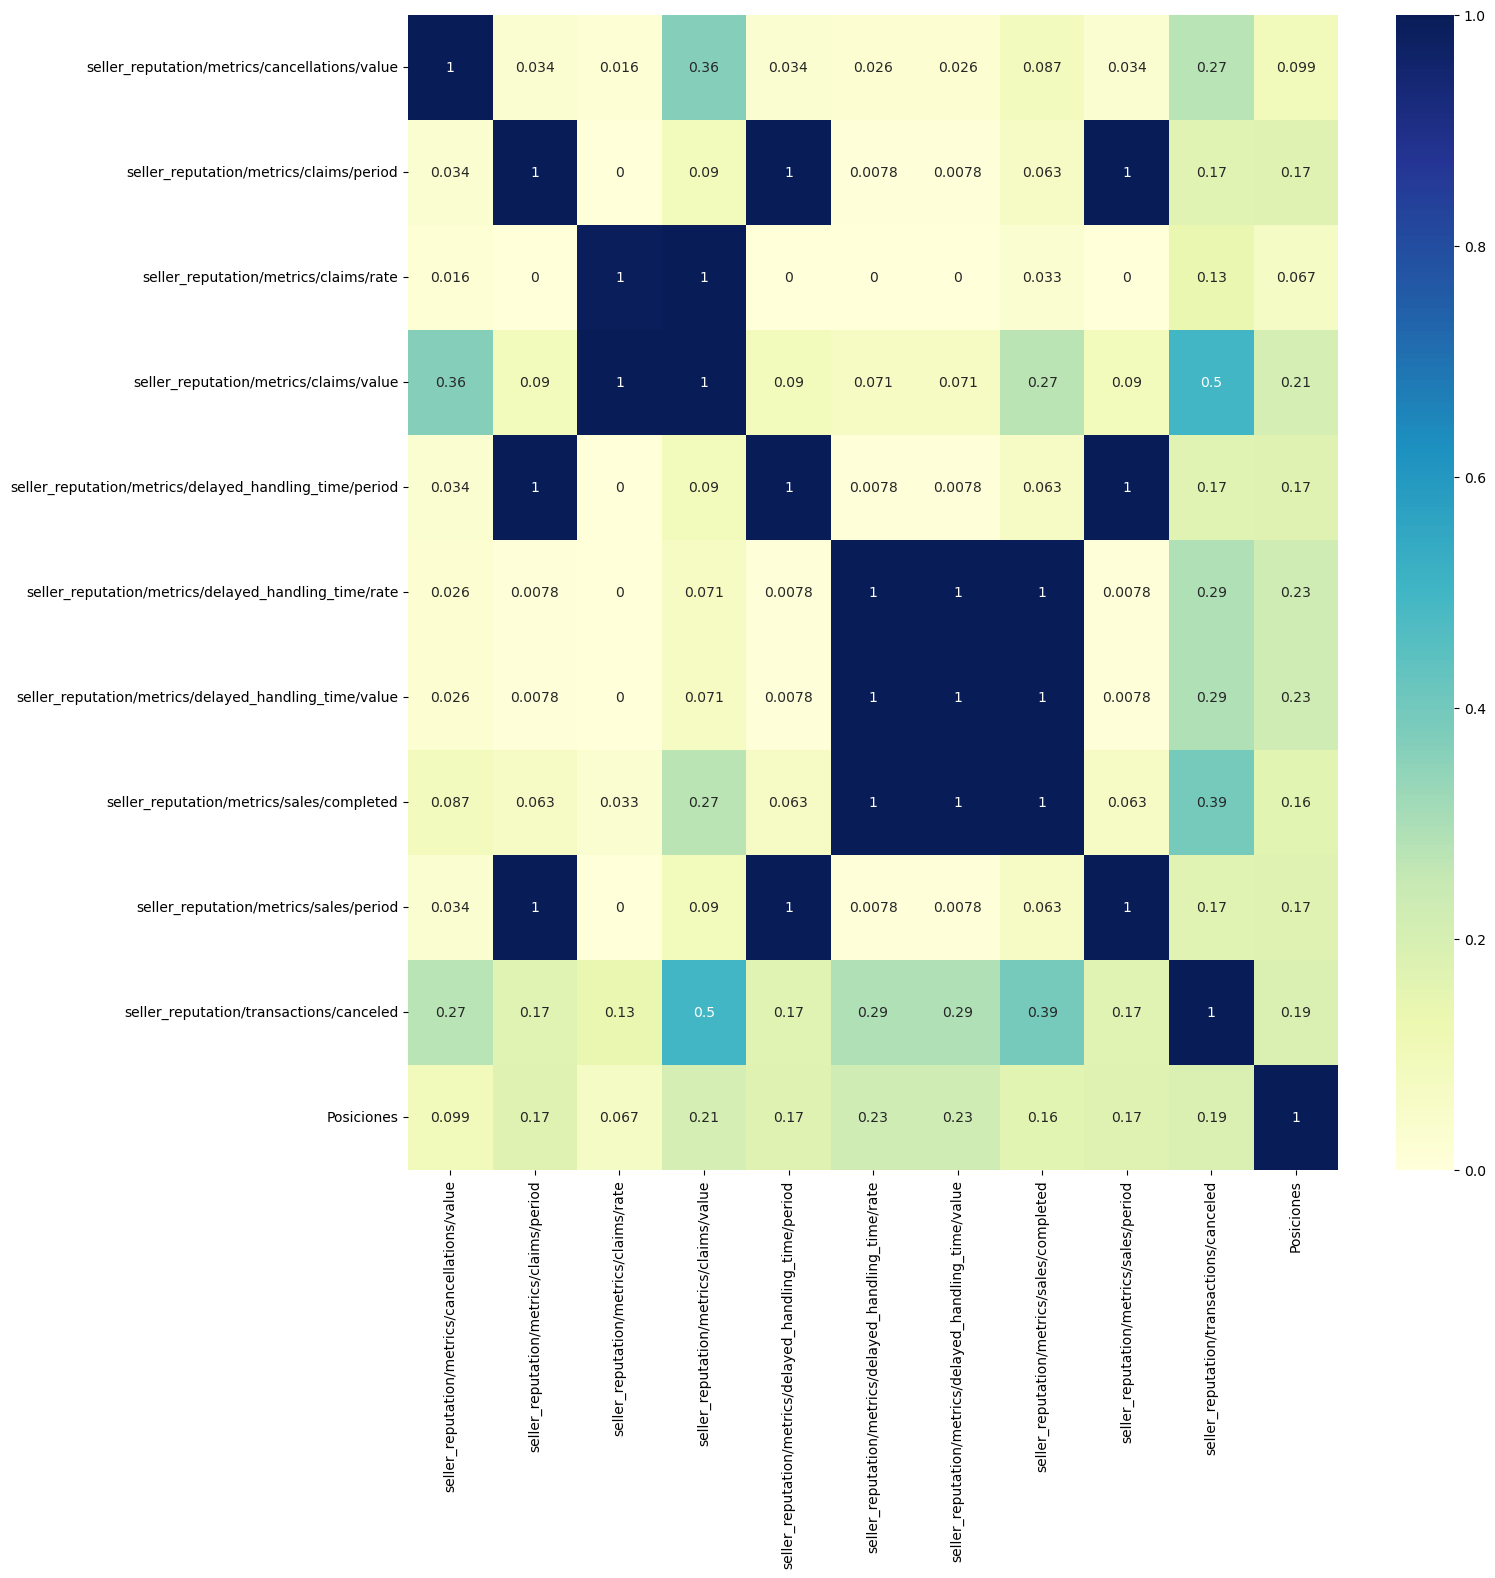

<Figure size 640x480 with 0 Axes>

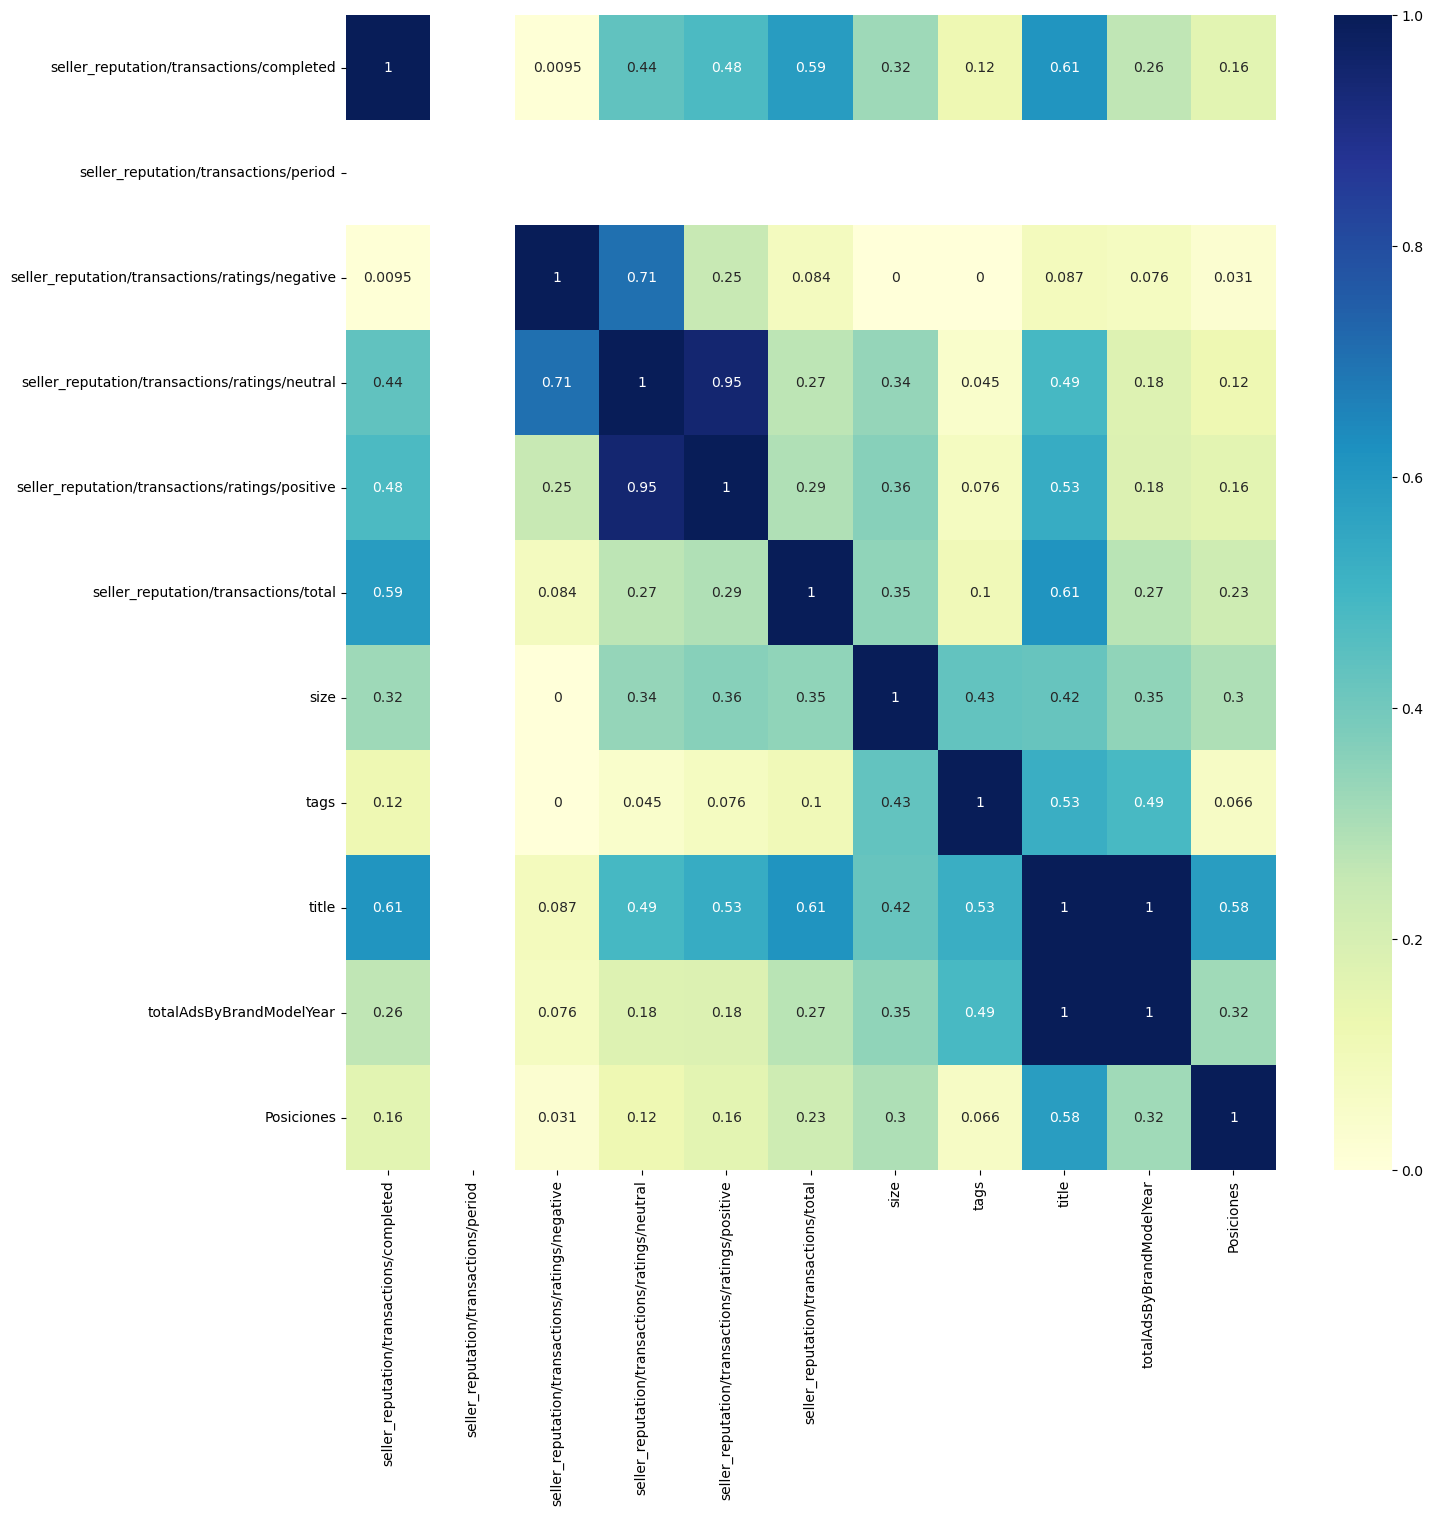

<Figure size 640x480 with 0 Axes>

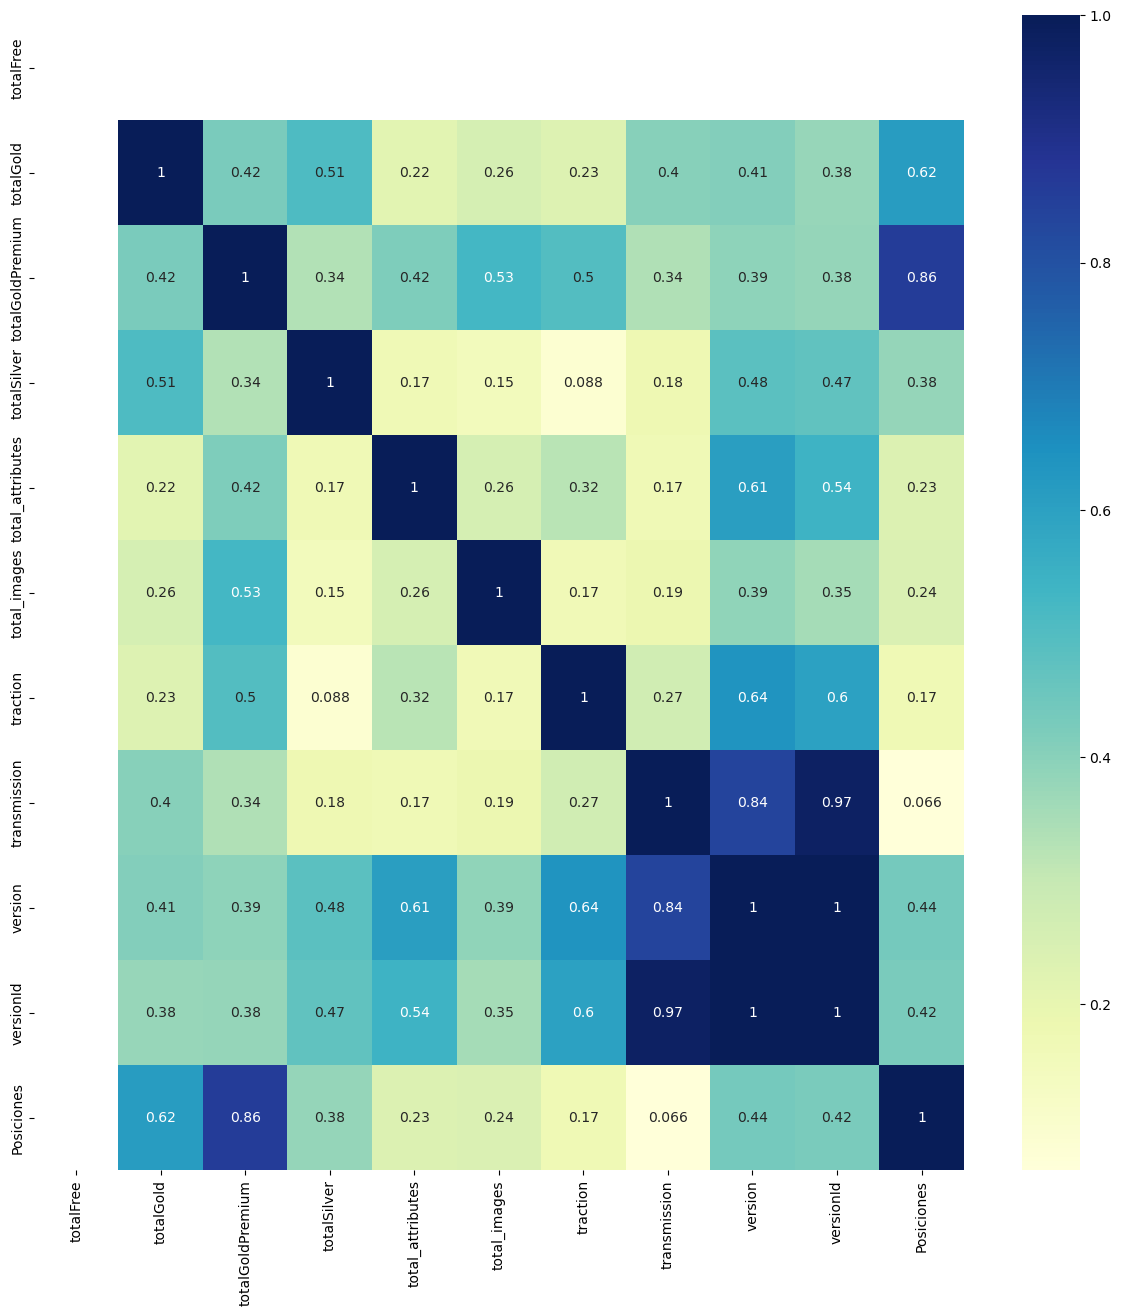

<Figure size 640x480 with 0 Axes>

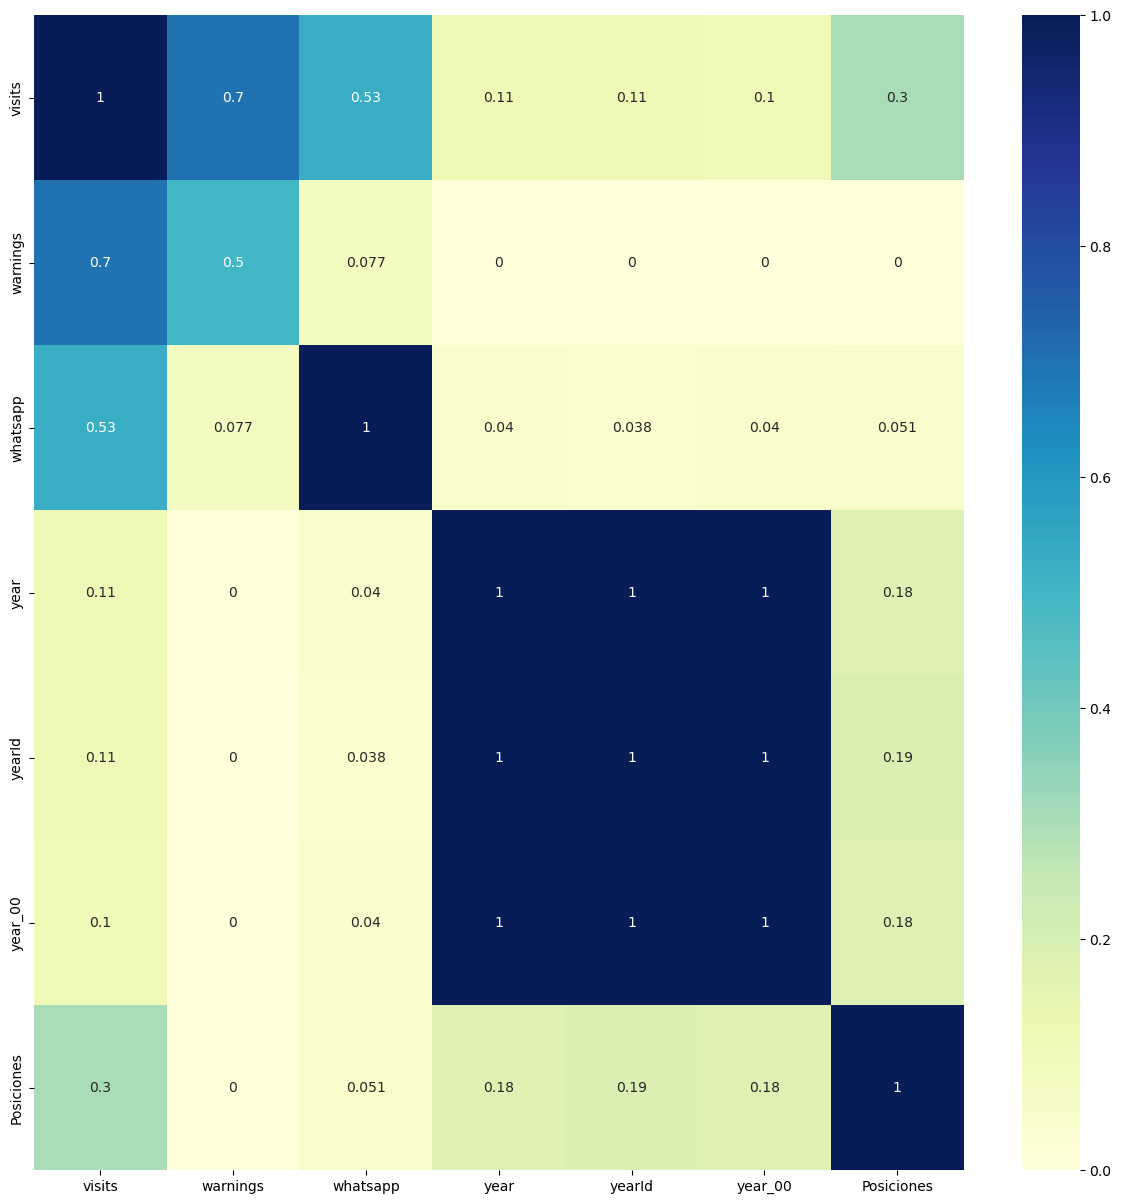

In [11]:
columnas_array = df.columns.to_numpy()
for i in range(0, len(columnas_array), 10):
    plt.clf()
    plt.figure(figsize=(15, 15))
    subconjunto = columnas_array[i:i+10]
    sub = np.append(subconjunto,"Posiciones")
    sub_df = df[sub]
    sub_df = sub_df.applymap(str)
    categorical_columns = sub_df.columns
    corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)
    for var1 in categorical_columns:
     for var2 in categorical_columns:
         corr_matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])
    #print("Matriz de Correlación de Cramer's V:")
    #print(corr_matrix)
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
    plt.show()
    #hora_actual =  datetime.datetime.now()
    #ruta_archivo = hora_actual.strftime("%Y-%m-%d_%H-%M-%S")+ ".png"
    #plt.savefig(ruta_archivo)